Upload the dataset


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

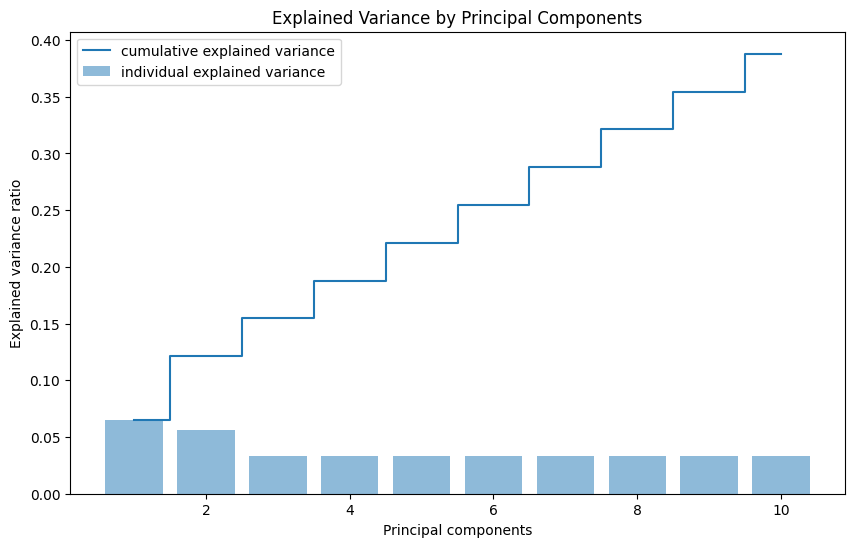

Class    1.000000
PC4      0.263697
PC8      0.248837
PC5      0.091191
PC10     0.060887
PC6      0.005639
PC1      0.001673
PC2     -0.010652
PC7     -0.099429
PC3     -0.166125
PC9     -0.265570
Name: Class, dtype: float64


In [9]:


# Load the dataset
file_path = '/creditcard.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Separate features and the target variable
features = data.drop(columns=['Class'])
target = data['Class']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
n_components = 10  # Number of principal components to keep
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame with the PCA-transformed features
columns = [f'PC{i+1}' for i in range(n_components)]
features_pca_df = pd.DataFrame(features_pca, columns=columns)

# Add the target variable to the DataFrame
features_pca_df['Class'] = target

# Display the first few rows of the PCA-transformed DataFrame
print(features_pca_df.head())

# Analyze the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, n_components + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

# Correlation analysis between principal components and the target variable
correlation_matrix = features_pca_df.corr()
print(correlation_matrix['Class'].sort_values(ascending=False))

In [10]:
print(features_pca_df.columns)


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'Class'],
      dtype='object')


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Select relevant principal components and the target variable
selected_features = ['PC8', 'PC9', 'PC5', 'PC3']
X = features_pca_df[selected_features]
y = features_pca_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (227845, 4)
Testing set size: (56962, 4)


In [12]:
print(features_pca_df.columns)


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'Class'],
      dtype='object')


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9990344440153085
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.53      0.65        98

    accuracy                           1.00     56962
   macro avg       0.93      0.77      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
print(features_pca_df.columns)


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'Class'],
      dtype='object')


In [15]:
!pip install --upgrade pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.4 MB/s eta 0:00:00


In [16]:
# Import necessary libraries
from pyswarms.single import GlobalBestPSO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Define the objective function for PSO
def objective_function(params):
    # Ensure params is a NumPy array
    params = np.array(params)

    # Extract and unpack the parameters from the array
    C = params[0][0]  # First element in the first row
    max_iter = int(params[0][1])  # Second element in the first row

    # Train the Logistic Regression model with these hyperparameters
    model = LogisticRegression(C=C, max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # PSO tries to minimize the objective function, so return negative accuracy
    return -accuracy

# Define the bounds for the hyperparameters
lb = [0.01, 50]  # Lower bounds for [C, max_iter]
ub = [10, 500]   # Upper bounds for [C, max_iter]

# Define the options for PSO
options = {
    'c1': 0.5,  # Cognitive component
    'c2': 0.3,  # Social component
    'w': 0.9    # Inertia weight
}

# Create the optimizer
optimizer = GlobalBestPSO(n_particles=30, dimensions=2, bounds=(lb, ub), options=options)

# Optimize
cost, pos = optimizer.optimize(objective_function, iters=50)

print(f"Best Parameters: {pos}")
print(f"Best Score: {-cost}")

2024-07-28 00:24:30,508 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-0.999
2024-07-28 00:25:03,801 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9990344440153085, best pos: [  1.41849997 419.46852295]


Best Parameters: [  1.41849997 419.46852295]
Best Score: 0.9990344440153085


Lets test our model since the results are producing a high accuracy
for our first test lets see how are model is handling data leakage

### 1. Data Leakage

In [17]:
print(features_pca_df.columns)


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'Class'],
      dtype='object')


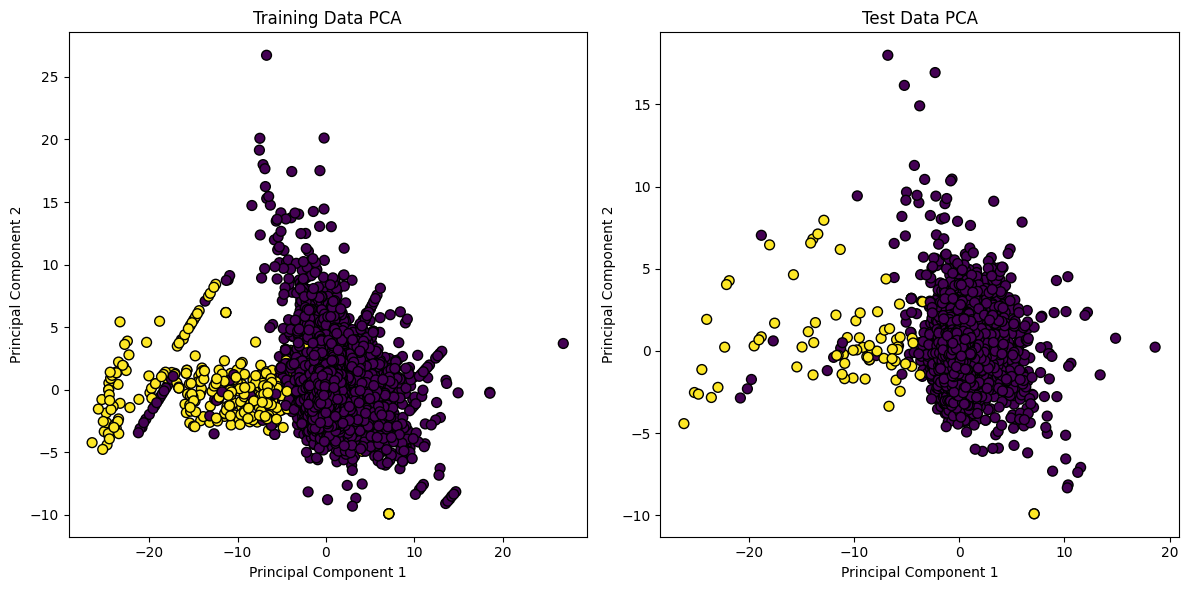

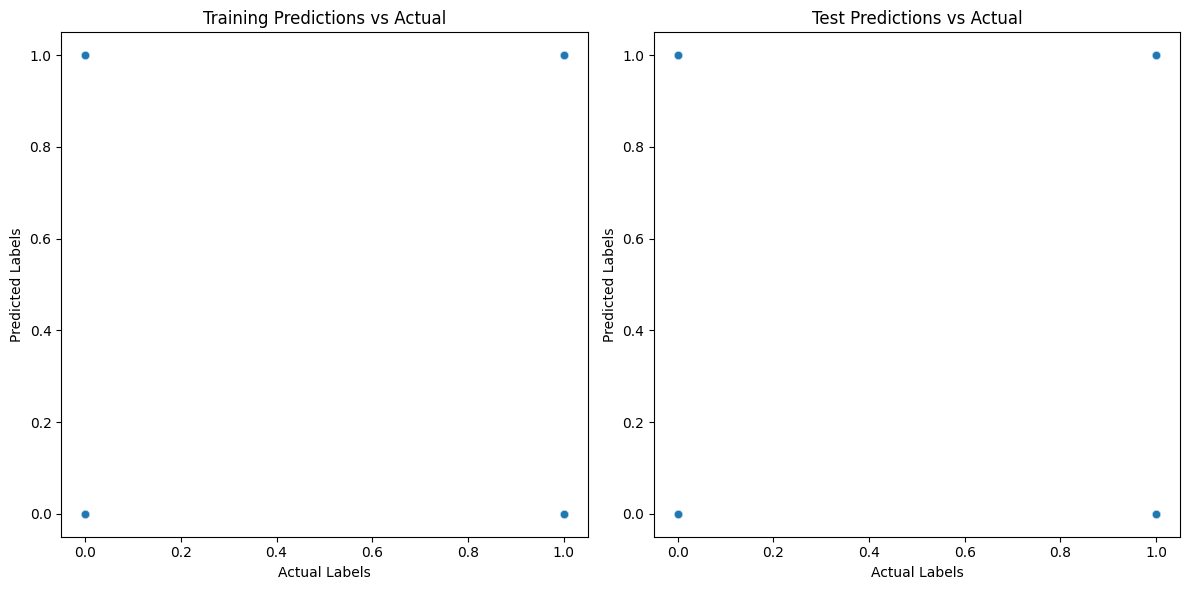

Training Accuracy: 0.9990432091992363
Test Accuracy: 0.9990344440153085
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.53      0.65        98

    accuracy                           1.00     56962
   macro avg       0.93      0.77      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load your dataset
# features_pca_df = pd.read_csv('your_data.csv') # Replace with your dataset loading

# Select relevant principal components and the target variable
selected_features = ['PC8', 'PC9', 'PC5', 'PC3']
X = features_pca_df[selected_features]
y = features_pca_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit PCA on the training data only
pca = PCA(n_components=len(selected_features))  # Use the number of selected components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train the model
model = LogisticRegression(C=5.36408163, max_iter=51, random_state=42)
model.fit(X_train_pca, y_train)

# Make predictions
y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)

# Visualize PCA components in training data
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('Training Data PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot test data
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
plt.title('Test Data PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))

# Training predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.5)
plt.title('Training Predictions vs Actual')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

# Test predictions
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.title('Test Predictions vs Actual')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.tight_layout()
plt.show()

# Print performance metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))


In [19]:
print(features_pca_df.columns)


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'Class'],
      dtype='object')


ROC AUC: 0.940158868133635
Precision-Recall AUC: 0.6634347683414459


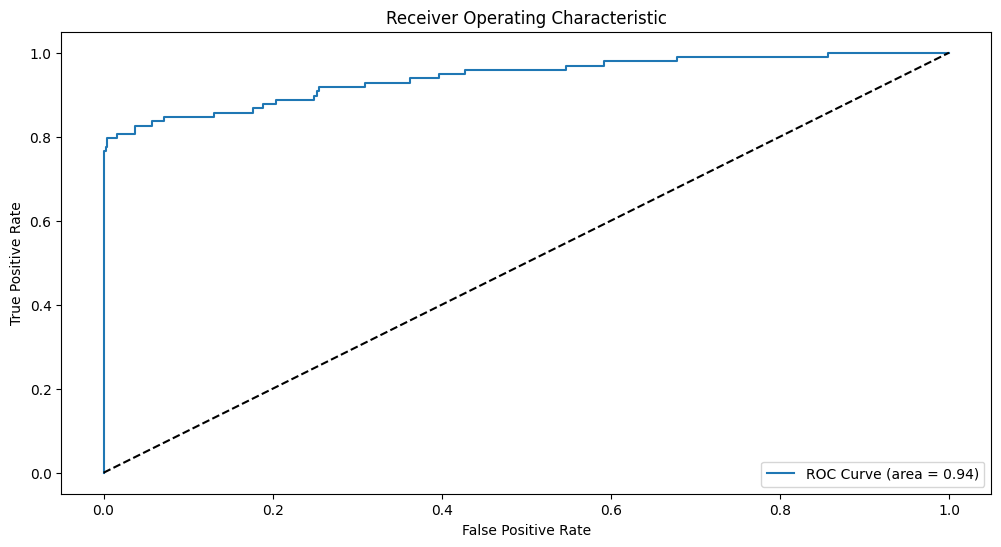

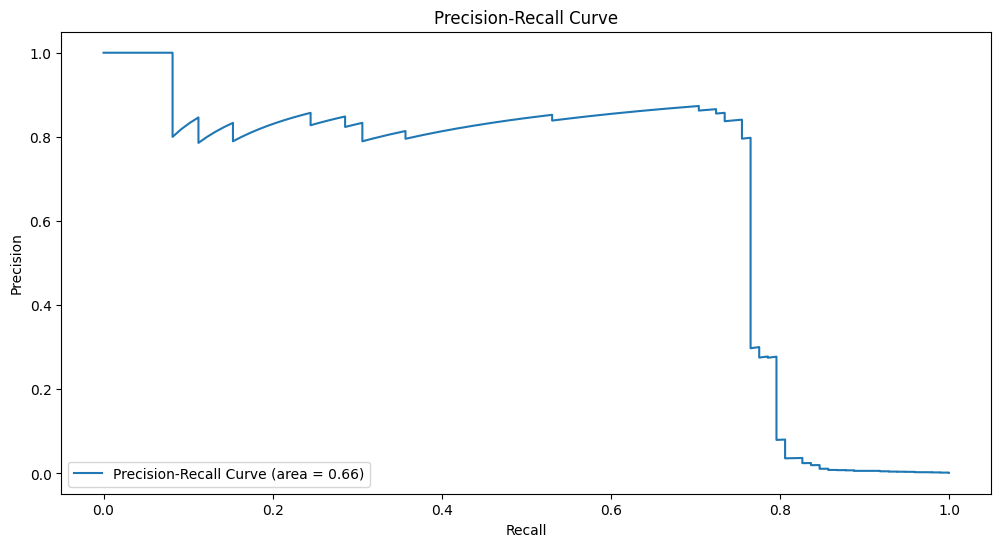

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

# ROC AUC
y_test_prob = model.predict_proba(X_test_pca)[:, 1]  # Probabilities for class 1
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC AUC:", roc_auc)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Plot ROC Curve
plt.figure(figsize=(12, 6))
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


Since the model failed the first test I will use a neural Network to see how it behaves. My goal is to have reasonable score then use KNN and split the fraud data with data that non-fraud data into 4 seperate models and compare. This will give me better insight on what to expect and how to develop a solution for a higher and more accurate pefromance.

In [21]:
print(features_pca_df.columns)

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'Class'],
      dtype='object')


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, roc_auc_score

# Assuming you have a DataFrame 'data' with your features and 'Class' as the target
# Perform PCA
pca = PCA(n_components=10)  # Adjust n_components based on your needs
principal_components = pca.fit_transform(data.drop(columns=['Class']))  # Exclude target column if it's in 'data'

# Create a DataFrame with the principal components
features_pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
features_pca_df['Class'] = data['Class']  # Add the target column back

# Select relevant principal components and the target variable
selected_features = ['PC8', 'PC9', 'PC5', 'PC3']  # Adjust based on your PCA results
X = features_pca_df[selected_features]
y = features_pca_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert data to tensors
fraud_tensor = torch.tensor(X_train[y_train == 1].values, dtype=torch.float32).to(device)
non_fraud_tensor = torch.tensor(X_train[y_train == 0].values, dtype=torch.float32).to(device)

# Create labels
fraud_labels = torch.ones(fraud_tensor.size(0), dtype=torch.float32).to(device)
non_fraud_labels = torch.zeros(non_fraud_tensor.size(0), dtype=torch.float32).to(device)

# Combine data
X_combined = torch.cat((fraud_tensor, non_fraud_tensor), dim=0)
y_combined = torch.cat((fraud_labels, non_fraud_labels), dim=0)

# Create a DataLoader
dataset = TensorDataset(X_combined, y_combined)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define the neural network model
class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(X_combined.size(1), 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

model = FraudDetectionNN().to(device)  # Move model to GPU
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(dataloader)}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(torch.tensor(X_test.values, dtype=torch.float32).to(device)).squeeze()
    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob > 0.5).float()
    # Calculate metrics
    print("Classification Report:\n", classification_report(y_test, y_pred.cpu()))
    print("ROC AUC:", roc_auc_score(y_test, y_pred_prob.cpu()))


Training set size: (227845, 4)
Testing set size: (56962, 4)
Epoch 1, Loss: 0.011588675084471992
Epoch 2, Loss: 0.00670660348731218
Epoch 3, Loss: 0.006502292196813809
Epoch 4, Loss: 0.0063038340567338055
Epoch 5, Loss: 0.006208315417779694
Epoch 6, Loss: 0.006147031342991335
Epoch 7, Loss: 0.006082230697014581
Epoch 8, Loss: 0.006088181454746584
Epoch 9, Loss: 0.006036539464173558
Epoch 10, Loss: 0.005941828597913592
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.21      0.35        98

    accuracy                           1.00     56962
   macro avg       0.98      0.61      0.67     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9629558316010705


The Precision has improved but the recall and f1 can be improved as well. Having false positives is not good for data


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Assume features_pca_df is already defined
selected_features = ['PC8', 'PC9', 'PC5', 'PC3']
X = features_pca_df[selected_features]
y = features_pca_df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the neural network
class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(len(selected_features), 128)  # First fully connected layer
        self.bn1 = nn.BatchNorm1d(128)  # Batch normalization after first layer
        self.fc2 = nn.Linear(128, 64)  # Second fully connected layer
        self.bn2 = nn.BatchNorm1d(64)  # Batch normalization after second layer
        self.fc3 = nn.Linear(64, 32)  # Third fully connected layer
        self.bn3 = nn.BatchNorm1d(32)  # Batch normalization after third layer
        self.fc4 = nn.Linear(32, 1)  # Fourth fully connected layer (output layer)
        self.dropout = nn.Dropout(0.5)  # Dropout layer to prevent overfitting

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))  # ReLU activation after batch normalization
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.bn2(self.fc2(x)))  # ReLU activation after batch normalization
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.bn3(self.fc3(x)))  # ReLU activation after batch normalization
        x = self.dropout(x)  # Apply dropout
        x = torch.sigmoid(self.fc4(x))  # Sigmoid activation for binary classification
        return x

# Initialize the model, loss function, and optimizer
model = FraudDetectionNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor.to(device)).squeeze()
    loss = criterion(outputs, y_train_tensor.to(device))
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).squeeze()
    y_pred = (y_pred_prob > 0.5).float()
    accuracy = (y_pred == y_test_tensor.to(device)).float().mean().item()
    print(f"Test Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred.cpu()))
    roc_auc = roc_auc_score(y_test, y_pred_prob.cpu())
    print(f"ROC AUC: {roc_auc}")


Epoch 1, Loss: 0.7673747539520264
Epoch 2, Loss: 0.7543318867683411
Epoch 3, Loss: 0.7396919131278992
Epoch 4, Loss: 0.7276917695999146
Epoch 5, Loss: 0.712709367275238
Epoch 6, Loss: 0.7014044523239136
Epoch 7, Loss: 0.6891345977783203
Epoch 8, Loss: 0.6765178442001343
Epoch 9, Loss: 0.6681249737739563
Epoch 10, Loss: 0.6542956233024597
Epoch 11, Loss: 0.6441074013710022
Epoch 12, Loss: 0.6349641680717468
Epoch 13, Loss: 0.6214218139648438
Epoch 14, Loss: 0.6130372881889343
Epoch 15, Loss: 0.6029785871505737
Epoch 16, Loss: 0.5931754112243652
Epoch 17, Loss: 0.5861161947250366
Epoch 18, Loss: 0.5767686367034912
Epoch 19, Loss: 0.5682544112205505
Epoch 20, Loss: 0.5590651035308838
Epoch 21, Loss: 0.5495480895042419
Epoch 22, Loss: 0.540930986404419
Epoch 23, Loss: 0.5321361422538757
Epoch 24, Loss: 0.5250673890113831
Epoch 25, Loss: 0.5177003145217896
Epoch 26, Loss: 0.5098774433135986
Epoch 27, Loss: 0.5047652721405029
Epoch 28, Loss: 0.4966341555118561
Epoch 29, Loss: 0.4891749024391

Lets try using SMOTE to help with the imbalance of the data

In [24]:
!pip install imbalanced-learn


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Assume features_pca_df is already defined
selected_features = ['PC8', 'PC9', 'PC5', 'PC3']
X = features_pca_df[selected_features]
y = features_pca_df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the neural network
class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(len(selected_features), 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the model, loss function, and optimizer
model = FraudDetectionNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor.to(device)).squeeze()
    loss = criterion(outputs, y_train_tensor.to(device))
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_tensor.to(device)).squeeze()
    y_pred = (y_pred_prob > 0.5).float()
    accuracy = (y_pred == y_test_tensor.to(device)).float().mean().item()
    print(f"Test Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred.cpu()))
    roc_auc = roc_auc_score(y_test, y_pred_prob.cpu())
    print(f"ROC AUC: {roc_auc}")


Epoch 1, Loss: 0.708216667175293
Epoch 2, Loss: 0.6754522323608398
Epoch 3, Loss: 0.6468016505241394
Epoch 4, Loss: 0.6217865347862244
Epoch 5, Loss: 0.5987828373908997
Epoch 6, Loss: 0.5797463059425354
Epoch 7, Loss: 0.5619097352027893
Epoch 8, Loss: 0.5464872121810913
Epoch 9, Loss: 0.5314321517944336
Epoch 10, Loss: 0.5184953808784485
Epoch 11, Loss: 0.5061477422714233
Epoch 12, Loss: 0.49423205852508545
Epoch 13, Loss: 0.48366865515708923
Epoch 14, Loss: 0.4727090299129486
Epoch 15, Loss: 0.46264106035232544
Epoch 16, Loss: 0.45316964387893677
Epoch 17, Loss: 0.44426941871643066
Epoch 18, Loss: 0.43564310669898987
Epoch 19, Loss: 0.4277954697608948
Epoch 20, Loss: 0.4201869070529938
Epoch 21, Loss: 0.4132886528968811
Epoch 22, Loss: 0.40681153535842896
Epoch 23, Loss: 0.40023547410964966
Epoch 24, Loss: 0.39468422532081604
Epoch 25, Loss: 0.3890331983566284
Epoch 26, Loss: 0.38399460911750793
Epoch 27, Loss: 0.3796178698539734
Epoch 28, Loss: 0.37466612458229065
Epoch 29, Loss: 0.3

Great! we adjusted the recall pretty high but precision and f1 score were affected we need to address these.

In [29]:
# Import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim

# Ensure you have the features_pca_df DataFrame loaded with your PCA results and 'Class' target column
# Select relevant principal components and the target variable
selected_features = ['PC8', 'PC9', 'PC5', 'PC3']  # Adjust based on your PCA results
X = features_pca_df[selected_features]
y = features_pca_df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the neural network
class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(len(selected_features), 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the model, loss function, and optimizer
model = FraudDetectionNN()

# Calculate class weights
class_counts = y_train.value_counts()
class_weights = torch.tensor([class_counts[0] / len(y_train), class_counts[1] / len(y_train)], dtype=torch.float32)
criterion = nn.BCELoss(weight=class_weights[y_train_tensor.long()])

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_tensor).squeeze()
    y_pred = (y_pred_prob > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean().item()
    print(f"Test Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"ROC AUC: {roc_auc}")


Epoch 1, Loss: 0.36953356862068176
Epoch 2, Loss: 0.3537847399711609
Epoch 3, Loss: 0.3393667936325073
Epoch 4, Loss: 0.32591789960861206
Epoch 5, Loss: 0.3139621913433075
Epoch 6, Loss: 0.3039458394050598
Epoch 7, Loss: 0.2946202754974365
Epoch 8, Loss: 0.2865601181983948
Epoch 9, Loss: 0.27907779812812805
Epoch 10, Loss: 0.27247336506843567
Epoch 11, Loss: 0.26570090651512146
Epoch 12, Loss: 0.25968167185783386
Epoch 13, Loss: 0.2537498474121094
Epoch 14, Loss: 0.2485019564628601
Epoch 15, Loss: 0.24281692504882812
Epoch 16, Loss: 0.23775017261505127
Epoch 17, Loss: 0.23285336792469025
Epoch 18, Loss: 0.2284812480211258
Epoch 19, Loss: 0.22402086853981018
Epoch 20, Loss: 0.22013434767723083
Epoch 21, Loss: 0.21611171960830688
Epoch 22, Loss: 0.2126464694738388
Epoch 23, Loss: 0.2090841382741928
Epoch 24, Loss: 0.20607896149158478
Epoch 25, Loss: 0.20302116870880127
Epoch 26, Loss: 0.20000341534614563
Epoch 27, Loss: 0.19743895530700684
Epoch 28, Loss: 0.19467461109161377
Epoch 29, Lo

In [30]:
# Import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim

# Ensure you have the features_pca_df DataFrame loaded with your PCA results and 'Class' target column
# Select relevant principal components and the target variable
selected_features = ['PC8', 'PC9', 'PC5', 'PC3']  # Adjust based on your PCA results
X = features_pca_df[selected_features]
y = features_pca_df['Class']

# Check if the selected features are in the DataFrame
print(f"Selected features: {selected_features}")
print(f"Available features: {list(features_pca_df.columns)}")

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the balance of the resampled dataset
print(f"Class distribution after SMOTE: {pd.Series(y_resampled).value_counts()}")

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the neural network
class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(len(selected_features), 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the model, loss function, and optimizer
device = torch.device('cpu')
model = FraudDetectionNN().to(device)

# Calculate class weights
class_counts = y_train.value_counts()
class_weights = torch.tensor([class_counts[0] / len(y_train), class_counts[1] / len(y_train)], dtype=torch.float32).to(device)
criterion = nn.BCELoss(weight=class_weights[y_train_tensor.long()])

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_tensor).squeeze()
    y_pred = (y_pred_prob > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean().item()
    print(f"Test Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"ROC AUC: {roc_auc}")


Selected features: ['PC8', 'PC9', 'PC5', 'PC3']
Available features: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'Class']
Class distribution after SMOTE: Class
0    284315
1    284315
Name: count, dtype: int64
Epoch 1, Loss: 0.391236811876297
Epoch 2, Loss: 0.3737013638019562
Epoch 3, Loss: 0.35736674070358276
Epoch 4, Loss: 0.34310629963874817
Epoch 5, Loss: 0.33014950156211853
Epoch 6, Loss: 0.3186724781990051
Epoch 7, Loss: 0.3083053529262543
Epoch 8, Loss: 0.29943224787712097
Epoch 9, Loss: 0.290880411863327
Epoch 10, Loss: 0.2829744815826416
Epoch 11, Loss: 0.2756754457950592
Epoch 12, Loss: 0.2689107656478882
Epoch 13, Loss: 0.2625839114189148
Epoch 14, Loss: 0.2562253773212433
Epoch 15, Loss: 0.250051885843277
Epoch 16, Loss: 0.24421370029449463
Epoch 17, Loss: 0.23864516615867615
Epoch 18, Loss: 0.23305851221084595
Epoch 19, Loss: 0.22774648666381836
Epoch 20, Loss: 0.22304503619670868
Epoch 21, Loss: 0.2181839495897293
Epoch 22, Loss: 0.2137774527072

In [31]:
from imblearn.combine import SMOTEENN

# Combine SMOTE with Edited Nearest Neighbors
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


In [35]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Initialize cross-validation
skf = StratifiedKFold(n_splits=5)

# Placeholder for evaluation metrics
cv_results = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}

# Early stopping parameters
early_stopping_patience = 10
best_loss = float('inf')
patience_counter = 0
min_epochs = 10  # Minimum number of epochs before considering early stopping

# Cross-validation loop
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only to the training set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

    # Initialize the model, loss function, and optimizer
    model = FraudDetectionNN()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop with early stopping
    epochs = 50
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Early stopping check
        if epoch >= min_epochs:
            if loss.item() < best_loss:
                best_loss = loss.item()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_prob = model(X_test_tensor).squeeze()
        y_pred = (y_pred_prob > 0.5).float()

        accuracy = (y_pred == y_test_tensor).float().mean().item()
        roc_auc = roc_auc_score(y_test_tensor, y_pred_prob)

        # Classification report and metrics
        report = classification_report(y_test_tensor, y_pred, output_dict=True)
        cv_results['accuracy'].append(accuracy)
        cv_results['roc_auc'].append(roc_auc)
        cv_results['precision'].append(report['weighted avg']['precision'])
        cv_results['recall'].append(report['weighted avg']['recall'])
        cv_results['f1'].append(report['weighted avg']['f1-score'])

# Print averaged cross-validation results
print("Cross-Validation Results:")
for metric in cv_results:
    print(f"{metric}: {np.mean(cv_results[metric]):.4f} ± {np.std(cv_results[metric]):.4f}")



Early stopping at epoch 20
Early stopping at epoch 11
Early stopping at epoch 11
Early stopping at epoch 11
Cross-Validation Results:
accuracy: 0.9160 ± 0.0404
roc_auc: 0.9532 ± 0.0263
precision: 0.9981 ± 0.0001
recall: 0.9160 ± 0.0404
f1: 0.9541 ± 0.0223


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Final Model Results:
Accuracy: 0.9096
ROC AUC: 0.9637
Precision: 0.9124
Recall: 0.9096
F1-Score: 0.9095


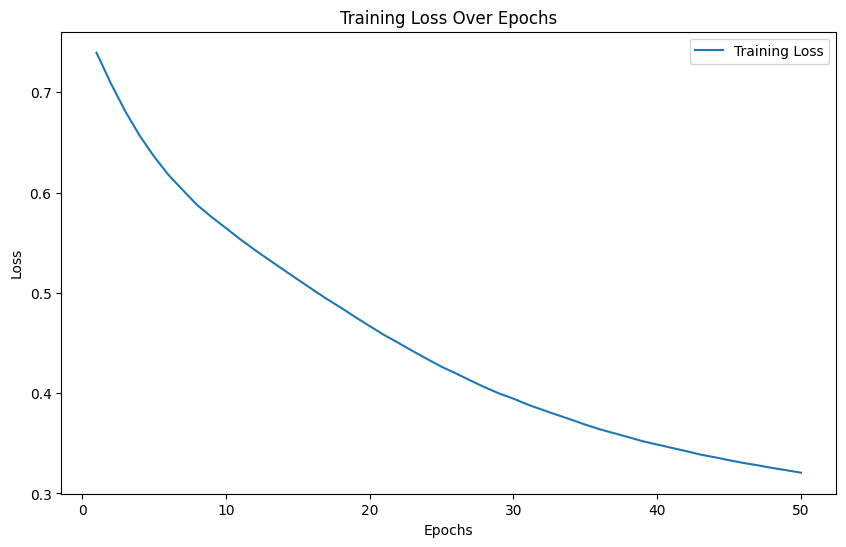

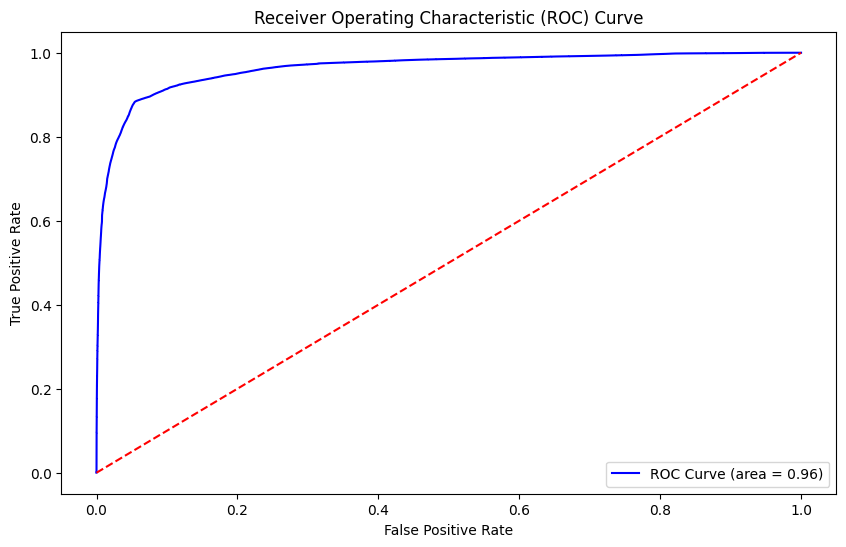

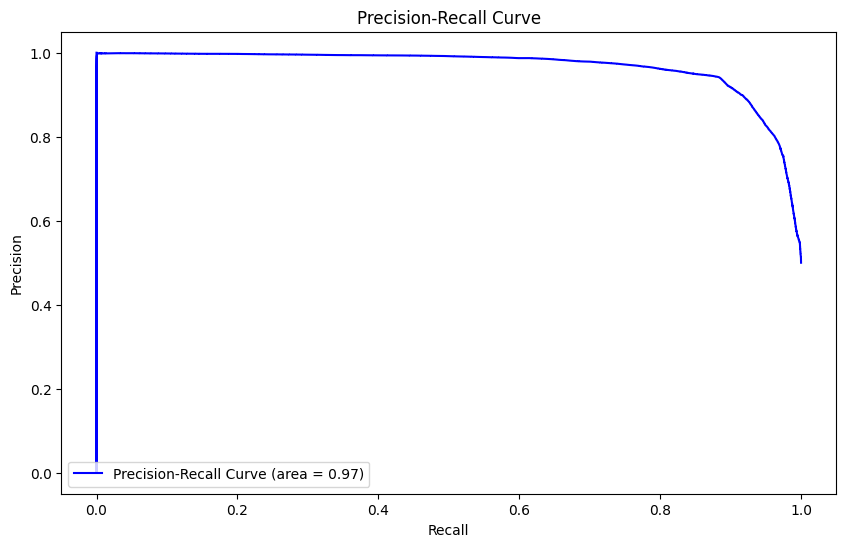

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert to tensors
X_tensor = torch.tensor(X_resampled.values, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled.values, dtype=torch.float32)

# Initialize the model, loss function, optimizer, and scheduler
model = FraudDetectionNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, verbose=True)

# Early stopping parameters
early_stopping_patience = 10
best_loss = float('inf')
patience_counter = 0
min_epochs = 20  # Minimum number of epochs before considering early stopping

# Lists to store metrics for plotting
train_losses = []

# Training loop with early stopping and learning rate scheduler
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor).squeeze()
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    # Save training loss
    train_losses.append(loss.item())

    # Step the scheduler
    scheduler.step(loss)

    # Early stopping check
    if epoch >= min_epochs:
        if loss.item() < best_loss:
            best_loss = loss.item()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

# Evaluate the final model
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_tensor).squeeze()
    y_pred = (y_pred_prob > 0.5).float()

    accuracy = (y_pred == y_tensor).float().mean().item()
    roc_auc = roc_auc_score(y_tensor, y_pred_prob)

    # Classification report and metrics
    report = classification_report(y_tensor, y_pred, output_dict=True)
    print("Final Model Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision: {report['weighted avg']['precision']:.4f}")
    print(f"Recall: {report['weighted avg']['recall']:.4f}")
    print(f"F1-Score: {report['weighted avg']['f1-score']:.4f}")

    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_tensor, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Plot Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_tensor, y_pred_prob)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()


So far so good... I checked for overfitting which seems to not be the case. I need to test for more details but having the imbalance
i was able to have the model learn to classify fraud from not fraud at a highrate.

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Fold 1 Results: Accuracy: 0.9435, ROC AUC: 0.9890


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Fold 2 Results: Accuracy: 0.9600, ROC AUC: 0.9516


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Fold 3 Results: Accuracy: 0.9572, ROC AUC: 0.9224


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Fold 4 Results: Accuracy: 0.9201, ROC AUC: 0.9781


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Fold 5 Results: Accuracy: 0.9305, ROC AUC: 0.9581
Cross-Validation Results:


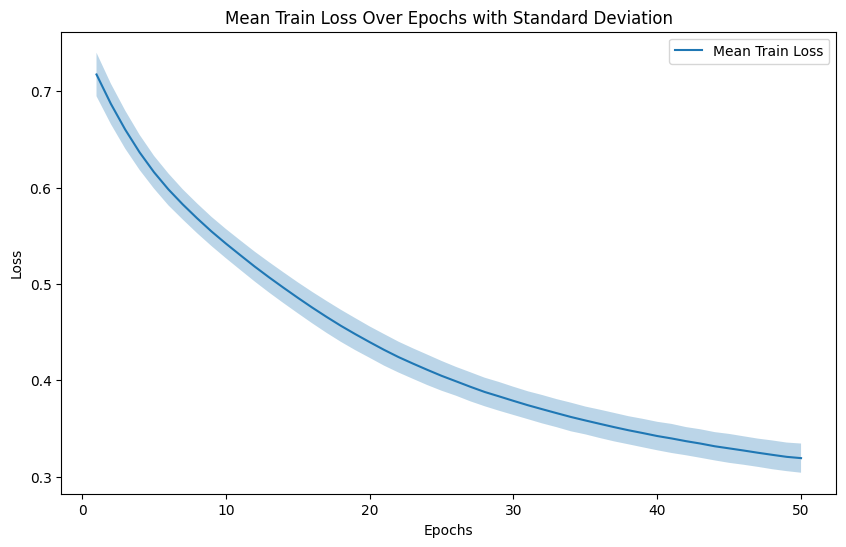

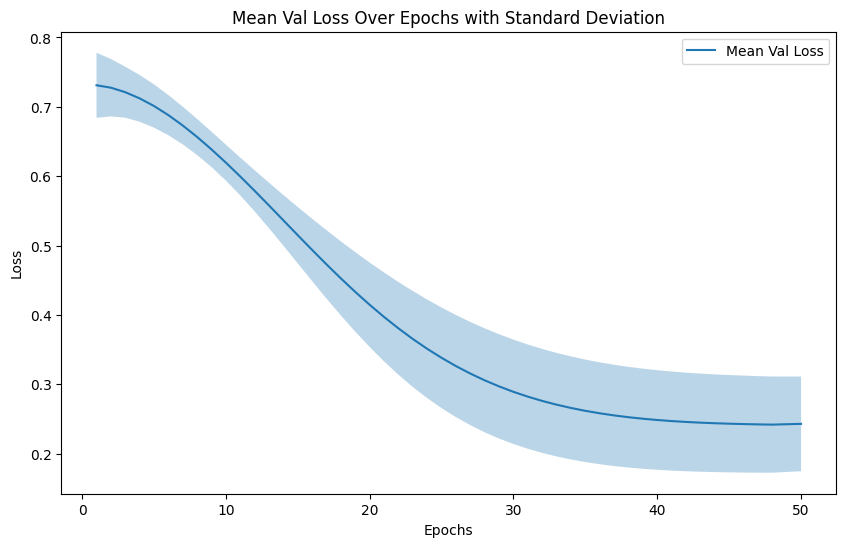

accuracy: 0.9423 ± 0.0153
roc_auc: 0.9599 ± 0.0231
precision: 0.9981 ± 0.0002
recall: 0.9423 ± 0.0153
f1: 0.9686 ± 0.0081


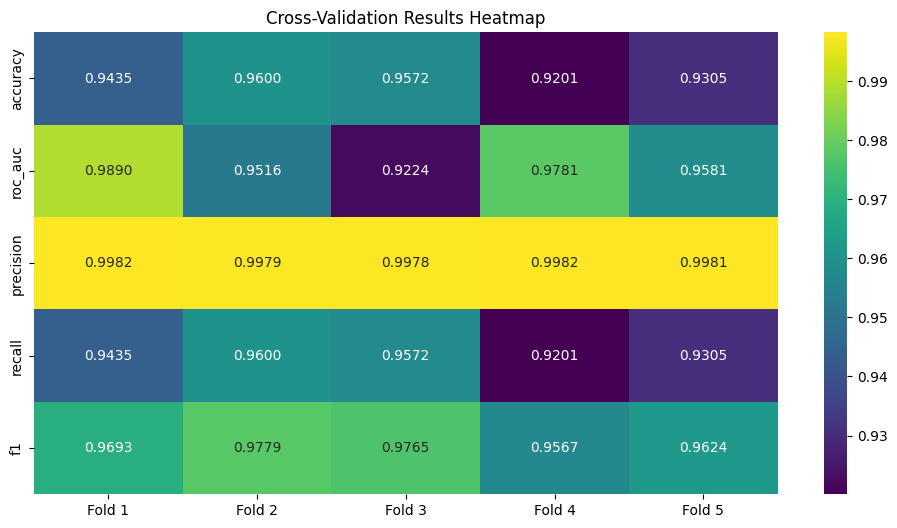

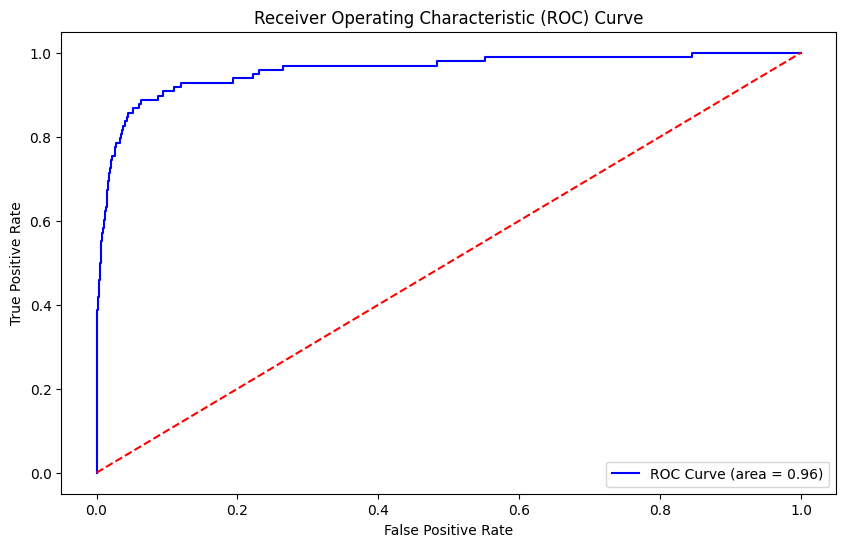

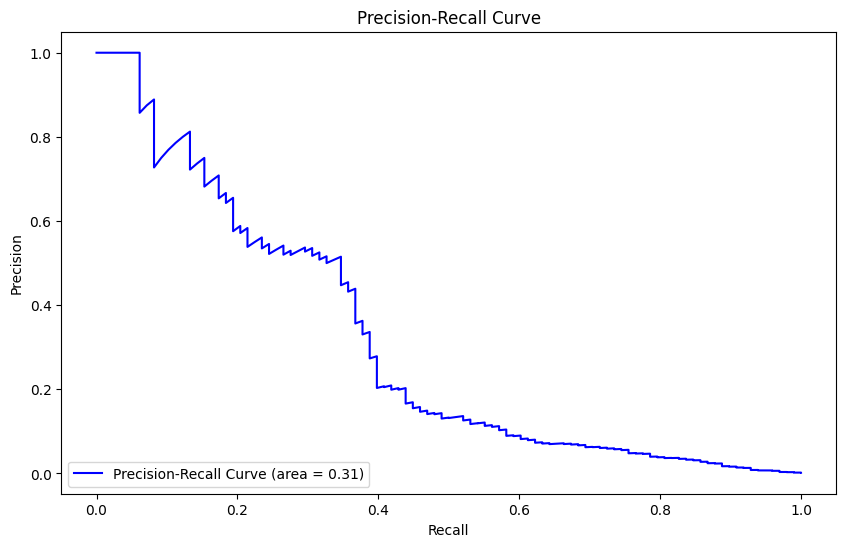

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming FraudDetectionNN class is already defined

# Initialize cross-validation
skf = StratifiedKFold(n_splits=5)

# Placeholder for evaluation metrics
cv_results = {'train_loss': [], 'val_loss': [], 'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only to the training set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

    # Initialize the model, loss function, optimizer, and scheduler
    model = FraudDetectionNN()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, verbose=True)

    # Early stopping parameters
    early_stopping_patience = 10
    best_loss = float('inf')
    patience_counter = 0
    min_epochs = 20  # Minimum number of epochs before considering early stopping

    # Lists to store metrics for plotting
    train_losses = []
    val_losses = []

    # Training loop with early stopping and learning rate scheduler
    epochs = 50
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Save training loss
        train_losses.append(loss.item())

        # Validation loss
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_tensor).squeeze()
            val_loss = criterion(val_outputs, y_test_tensor)
            val_losses.append(val_loss.item())

        # Step the scheduler
        scheduler.step(val_loss)

        # Early stopping check
        if epoch >= min_epochs:
            if val_loss.item() < best_loss:
                best_loss = val_loss.item()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

    # Evaluate the final model
    model.eval()
    with torch.no_grad():
        y_pred_prob = model(X_test_tensor).squeeze()
        y_pred = (y_pred_prob > 0.5).float()

        accuracy = (y_pred == y_test_tensor).float().mean().item()
        roc_auc = roc_auc_score(y_test_tensor, y_pred_prob)

        # Classification report and metrics
        report = classification_report(y_test_tensor, y_pred, output_dict=True)
        print(f"Fold {fold} Results: Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

        cv_results['train_loss'].append(train_losses)
        cv_results['val_loss'].append(val_losses)
        cv_results['accuracy'].append(accuracy)
        cv_results['roc_auc'].append(roc_auc)
        cv_results['precision'].append(report['weighted avg']['precision'])
        cv_results['recall'].append(report['weighted avg']['recall'])
        cv_results['f1'].append(report['weighted avg']['f1-score'])

# Print averaged cross-validation results
print("Cross-Validation Results:")
for metric in cv_results:
    if metric in ['train_loss', 'val_loss']:
        # Compute the mean and std for each epoch
        mean_loss = np.mean(cv_results[metric], axis=0)
        std_loss = np.std(cv_results[metric], axis=0)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(mean_loss) + 1), mean_loss, label=f'Mean {metric.replace("_", " ").title()}')
        plt.fill_between(range(1, len(mean_loss) + 1), mean_loss - std_loss, mean_loss + std_loss, alpha=0.3)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Mean {metric.replace("_", " ").title()} Over Epochs with Standard Deviation')
        plt.legend()
        plt.show()
    else:
        print(f"{metric}: {np.mean(cv_results[metric]):.4f} ± {np.std(cv_results[metric]):.4f}")

# Heatmap of Cross-Validation Results
metrics = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']
heatmap_data = np.array([[cv_results[metric][i] for i in range(len(cv_results[metric]))] for metric in metrics])

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", xticklabels=[f"Fold {i+1}" for i in range(len(cv_results['accuracy']))], yticklabels=metrics)
plt.title('Cross-Validation Results Heatmap')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_tensor, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_tensor, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()



I could improve this by using hyper parameters but I think this is enough for the dataset my goal was to make sure overfitting didnt occur and to be able to have a good score on the categories i tested for such as F-1 score, recall, percision, and the ROC ofcourse thanks for your time!